## **Part 1 : Synthetic Data Generation**
**Instructioins**:
*Each Row should have following columns*

1.   Job Title
2.   Location 
3.   Hospital Name
4. Contract start date
5. Contract end date
6. Hourly Pay rate



In [4]:
## importing required libraries
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta

In [5]:
# Function to generate job titles
def generate_job_titles(num_samples):
    job_titles = [
        "RegisteredNurse_ICU", "RegisteredNurse_MedSurg", "RegisteredNurse_Telemetry",
        "RegisteredNurse_Oncology", "RegisteredNurse_Pediatric", "PhysioTherapist",
        "LabTechnician", "RegisteredNurse_CriticalCare", "RegisteredNurse_Cardiology",
        "RegisteredNurse_Surgery"
    ]
    return np.random.choice(job_titles, num_samples)

# Function to generate locations
def generate_locations(num_samples):
    locations = [
        "Dallas", "Atlanta", "New York", "Philadelphia", "Washington", "San Francisco",
        "Los Angeles", "Seattle", "Chicago", "San Diego", "Miami", "Boston",
        "Detroit", "Phoenix", "Houston"
    ]
    return np.random.choice(locations, num_samples)

# Function to generate contract dates
def generate_contract_dates(num_samples):
    start_dates = []
    end_dates = []

    for _ in range(num_samples):
        start_date = datetime.strptime('2023-01-01', '%Y-%m-%d') + timedelta(days=random.randint(0, 730))
        contract_length = random.randint(21, 91)  # Between 3 weeks and 13 weeks
        end_date = start_date + timedelta(days=contract_length)

        start_dates.append(start_date.strftime('%Y-%m-%d'))
        end_dates.append(end_date.strftime('%Y-%m-%d'))

    return start_dates, end_dates

# Function to generate hospital names
def generate_hospital_names(locations):
    suffixes = ["Corporate", "NonProfit", "Community", "Veterans", "Govt"]
    hospitals = []

    for location in locations:
        suffix = random.choice(suffixes)
        hospitals.append(f"{location}_{suffix}")

    return hospitals

# Function to calculate hourly pay rate based on cost of living
def calculate_hourly_pay(locations):
    cost_of_living = {
        "Dallas": 105, "Atlanta": 102, "New York": 135, "Philadelphia": 110,
        "Washington": 120, "San Francisco": 140, "Los Angeles": 130, "Seattle": 125,
        "Chicago": 115, "San Diego": 128, "Miami": 118, "Boston": 132,
        "Detroit": 98, "Phoenix": 100, "Houston": 104
    }
    base_rate = 40  # Base hourly rate in dollars

    return [round(base_rate * (cost_of_living[loc] / 100) + random.uniform(-5, 5), 2) for loc in locations]

# Function to adjust pay for winter and Christmas season
def adjust_pay_rate(start_dates, hourly_rates):
    adjusted_rates = []

    for start_date, rate in zip(start_dates, hourly_rates):
        date = datetime.strptime(start_date, '%Y-%m-%d')
        if date.month in [12, 1, 2] or (date.month == 12 and 24 <= date.day <= 31):
            adjusted_rates.append(round(rate * 1.15, 2))
        else:
            adjusted_rates.append(rate)

    return adjusted_rates

# Main function to generate synthetic dataset
def generate_synthetic_data(num_samples):
    data = {}

    # Generate data for each column
    data['Job_Title'] = generate_job_titles(num_samples)
    data['Location'] = generate_locations(num_samples)
    data['Hospital_Name'] = generate_hospital_names(data['Location'])
    data['Contract_Start_Date'], data['Contract_End_Date'] = generate_contract_dates(num_samples)
    #data['Hourly_Pay_Rate'] = calculate_hourly_pay(data['Location'])
    data['Hourly_Pay_Rate($)'] = adjust_pay_rate(data['Contract_Start_Date'], calculate_hourly_pay(data['Location']))

    # Create DataFrame
    df = pd.DataFrame(data)
    ## nurses in nurse_type are having 20% high salary
    nurse_type = ["RegisteredNurse_Surgery","RegisteredNurse_Oncology","RegisteredNurse_Cardiology"]
    df.loc[df['Job_Title'].isin(nurse_type), 'Hourly_Pay_Rate($)']*=1.20
    nurse_type2 = ["LabTechnician","RegisteredNurse_CriticalCare","RegisteredNurse_ICU"]
    df.loc[df['Job_Title'].isin(nurse_type2), 'Hourly_Pay_Rate($)']*=1.10

    ## suppose that hourly pay rate was 5% less in 2023 as compared to 2024
    df['Contract_Start_Date'] = pd.to_datetime(df['Contract_Start_Date'])
    df.loc[df['Contract_Start_Date'].dt.year == 2023, 'Hourly_Pay_Rate($)'] *= 0.95
    return df

# Generate dataset
seed = 12
random.seed(seed)
np.random.seed(seed)
num_samples = 250000
df = generate_synthetic_data(num_samples)

# Display a sample of the dataset
df.head()

,Job_Title,Location,Hospital_Name,Contract_Start_Date,Contract_End_Date,Hourly_Pay_Rate($)
0,LabTechnician,Chicago,Chicago_Veterans,2023-11-28,2023-12-28,49.16725
1,RegisteredNurse_MedSurg,Washington,Washington_Community,2023-03-26,2023-05-12,47.50950
2,RegisteredNurse_Telemetry,San Francisco,San Francisco_Govt,2023-10-13,2023-12-07,53.02900
3,RegisteredNurse_Oncology,Washington,Washington_Community,2024-06-15,2024-07-20,55.59600
4,RegisteredNurse_Oncology,Dallas,Dallas_NonProfit,2023-04-20,2023-06-08,43.55940


In [6]:
# df = df.sort_values(by='Contract_Start_Date')

In [7]:
df['Contract_End_Date'] = pd.to_datetime(df['Contract_End_Date'])

In [8]:
df.to_csv('synthetic_data.csv',index = False)

In [9]:
df.Job_Title.unique()

array(['LabTechnician', 'RegisteredNurse_MedSurg',
       'RegisteredNurse_Telemetry', 'RegisteredNurse_Oncology',
       'RegisteredNurse_ICU', 'RegisteredNurse_Pediatric',
       'PhysioTherapist', 'RegisteredNurse_Surgery',
       'RegisteredNurse_Cardiology', 'RegisteredNurse_CriticalCare'],
      dtype=object)

In [10]:
df.shape

(250000, 6)

##**Part2: EDA**

In [11]:
df.iloc[:,:3].nunique()

Job_Title        10
Location         15
Hospital_Name    75
dtype: int64

In [12]:
## importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
## getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Job_Title            250000 non-null  object        
 1   Location             250000 non-null  object        
 2   Hospital_Name        250000 non-null  object        
 3   Contract_Start_Date  250000 non-null  datetime64[ns]
 4   Contract_End_Date    250000 non-null  datetime64[ns]
 5   Hourly_Pay_Rate($)   250000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 11.4+ MB


In [14]:
## describing the dataset
df.describe()

,Contract_Start_Date,Contract_End_Date,Hourly_Pay_Rate($)
count,250000,250000,250000.000000
mean,2023-12-31 15:08:08.678399744,2024-02-25 15:22:53.760000,51.784003
min,2023-01-01 00:00:00,2023-01-22 00:00:00,32.499500
25%,2023-07-02 00:00:00,2023-08-27 00:00:00,45.429000
50%,2024-01-01 00:00:00,2024-02-25 00:00:00,51.194550
75%,2024-07-01 00:00:00,2024-08-26 00:00:00,57.454100
max,2024-12-31 00:00:00,2025-04-01 00:00:00,84.072000
std,NaN,NaN,8.551383


In [15]:
## looking for the null values
df.isnull().sum()

Job_Title              0
Location               0
Hospital_Name          0
Contract_Start_Date    0
Contract_End_Date      0
Hourly_Pay_Rate($)     0
dtype: int64

In [16]:
## removing duplicate values
df = df.drop_duplicates()
df.shape

(250000, 6)

In [17]:
## looking into the values in the dataframe
df.Job_Title.value_counts()

Job_Title
LabTechnician                   25240
RegisteredNurse_Oncology        25132
RegisteredNurse_MedSurg         25126
RegisteredNurse_ICU             25033
RegisteredNurse_CriticalCare    25026
RegisteredNurse_Telemetry       25003
RegisteredNurse_Cardiology      24991
RegisteredNurse_Pediatric       24848
RegisteredNurse_Surgery         24834
PhysioTherapist                 24767
Name: count, dtype: int64

In [18]:
df.Location.value_counts()

Location
Chicago          16950
New York         16769
Philadelphia     16744
Los Angeles      16736
Dallas           16697
Houston          16689
Seattle          16688
Phoenix          16679
San Diego        16674
Washington       16661
Detroit          16607
San Francisco    16590
Miami            16548
Atlanta          16514
Boston           16454
Name: count, dtype: int64

In [19]:
## removing the space from locations
df.Location = df.Location.apply(lambda x: x.replace(' ','_'))

In [20]:
df.Hospital_Name.value_counts()

Hospital_Name
Chicago_Veterans         3577
Detroit_Community        3456
Philadelphia_Veterans    3441
Los Angeles_NonProfit    3437
Seattle_Community        3430
                         ... 
Boston_NonProfit         3220
Detroit_Veterans         3215
Atlanta_Community        3214
San Diego_Community      3212
Miami_Veterans           3209
Name: count, Length: 75, dtype: int64

#**Showing variations of the hourly pay rates across thec major metros**

<Axes: xlabel='Hourly_Pay_Rate($)', ylabel='Count'>

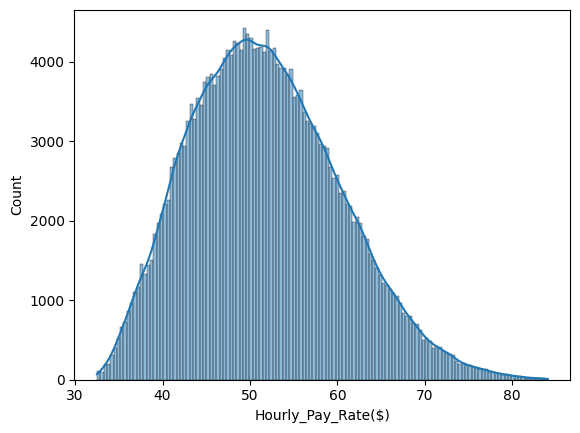

In [21]:
sns.histplot(df['Hourly_Pay_Rate($)'],kde=True)

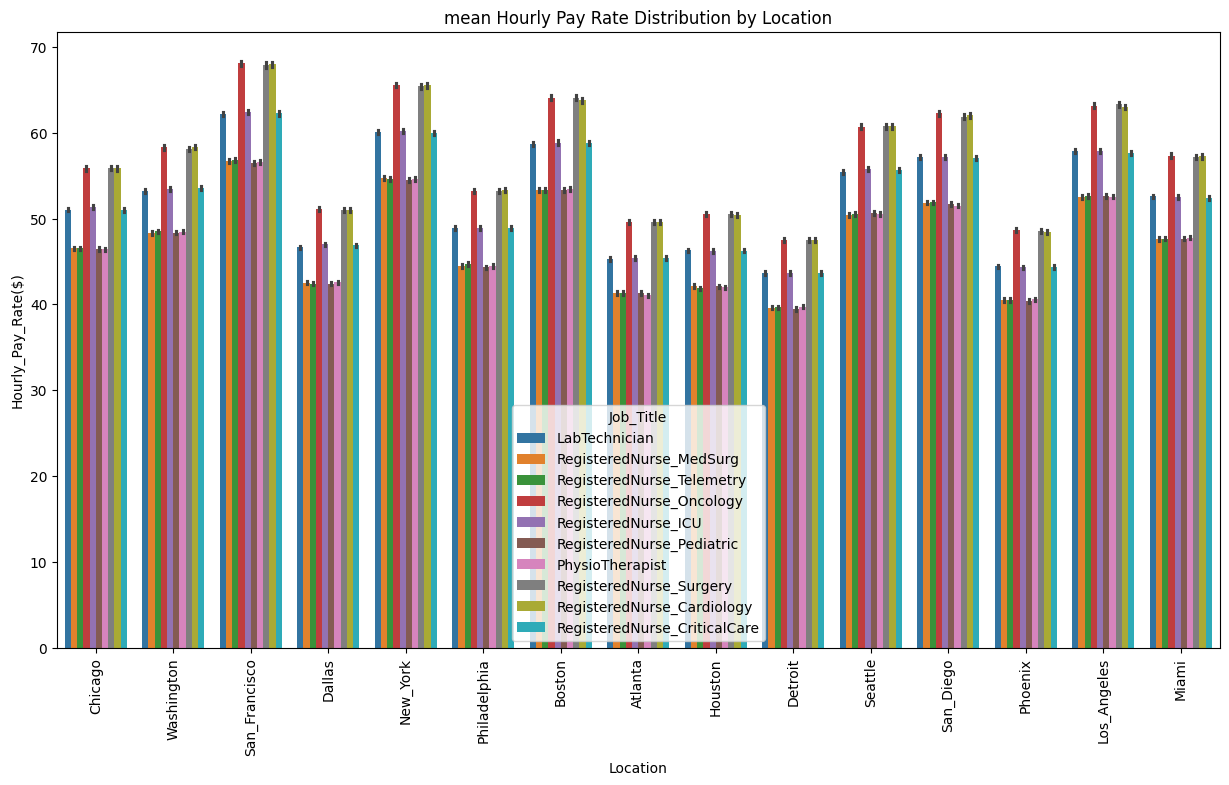

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(x='Location', y='Hourly_Pay_Rate($)', hue='Job_Title', data=df, estimator='mean')
plt.title('mean Hourly Pay Rate Distribution by Location')
plt.xticks(rotation=90)
plt.show()

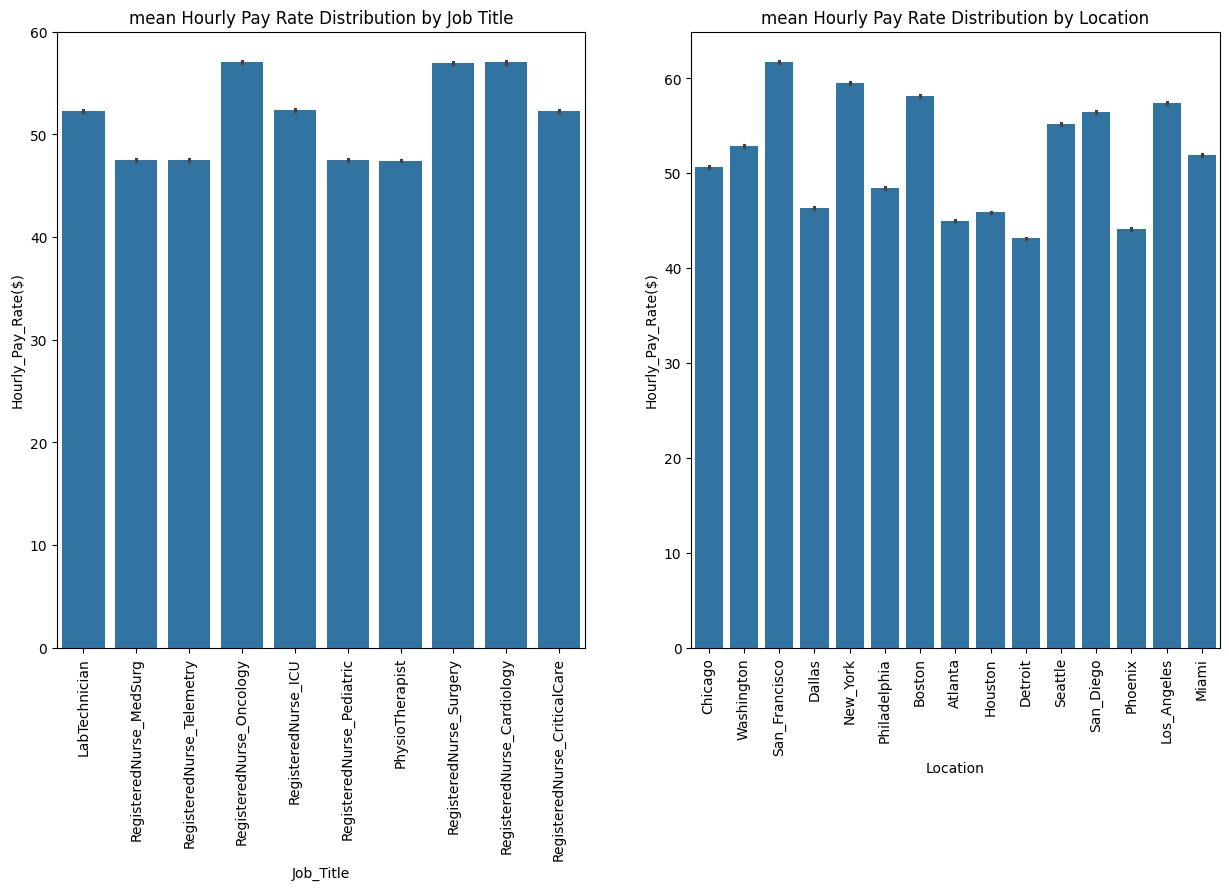

In [23]:
## showing the variability in hourly pay rates in major
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(x='Job_Title', y='Hourly_Pay_Rate($)', data=df, estimator='mean')
plt.title('mean Hourly Pay Rate Distribution by Job Title')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x='Location', y='Hourly_Pay_Rate($)', data=df, estimator='mean')
plt.title('mean Hourly Pay Rate Distribution by Location')
plt.xticks(rotation=90)
plt.show()

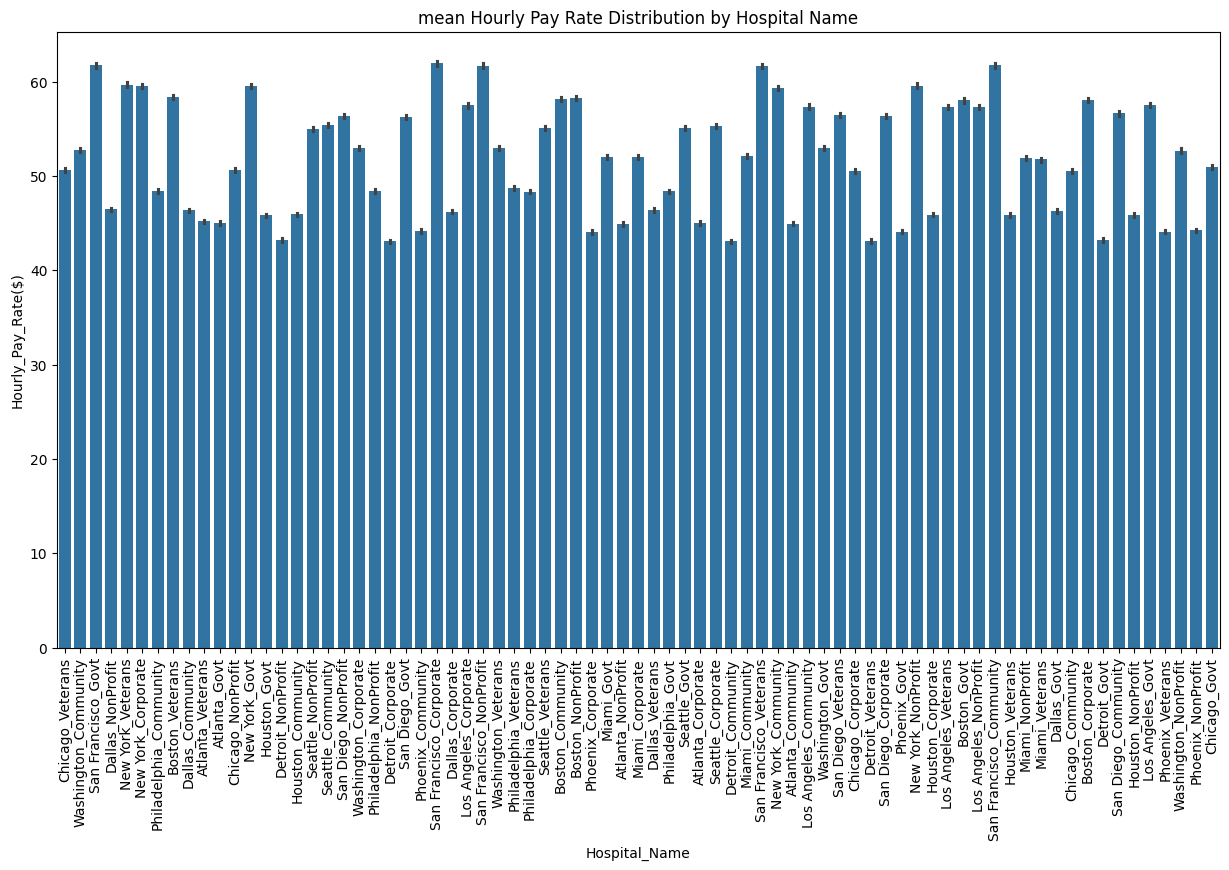

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x='Hospital_Name', y='Hourly_Pay_Rate($)', data=df, estimator='mean')
plt.title('mean Hourly Pay Rate Distribution by Hospital Name')
plt.xticks(rotation=90)
plt.show()

## **showing the uptick in pay rates during flu & holiday season**

In [25]:
## converting Contract_Start_Date column to date format
df['Contract_Start_Date'] = pd.to_datetime(df['Contract_Start_Date'])

df['Month_Year'] = df['Contract_Start_Date'].dt.to_period('M') ## stored all the month and year in Month_Year column

monthly_avg = df.groupby('Month_Year')['Hourly_Pay_Rate($)'].mean().reset_index() ## grouped data according to month_year column and took mean of Hourly_Pay_Rate($) in each month
monthly_avg['Month_Year'] = monthly_avg['Month_Year'].dt.to_timestamp() ## conversion to timestamp

In [34]:
df.head()

,Job_Title,Location,Hospital_Name,Contract_Start_Date,Contract_End_Date,Hourly_Pay_Rate($),Month_Year
0,LabTechnician,Chicago,Chicago_Veterans,2023-11-28,2023-12-28,49.16725,2023-11
1,RegisteredNurse_MedSurg,Washington,Washington_Community,2023-03-26,2023-05-12,47.50950,2023-03
2,RegisteredNurse_Telemetry,San_Francisco,San Francisco_Govt,2023-10-13,2023-12-07,53.02900,2023-10
3,RegisteredNurse_Oncology,Washington,Washington_Community,2024-06-15,2024-07-20,55.59600,2024-06
4,RegisteredNurse_Oncology,Dallas,Dallas_NonProfit,2023-04-20,2023-06-08,43.55940,2023-04


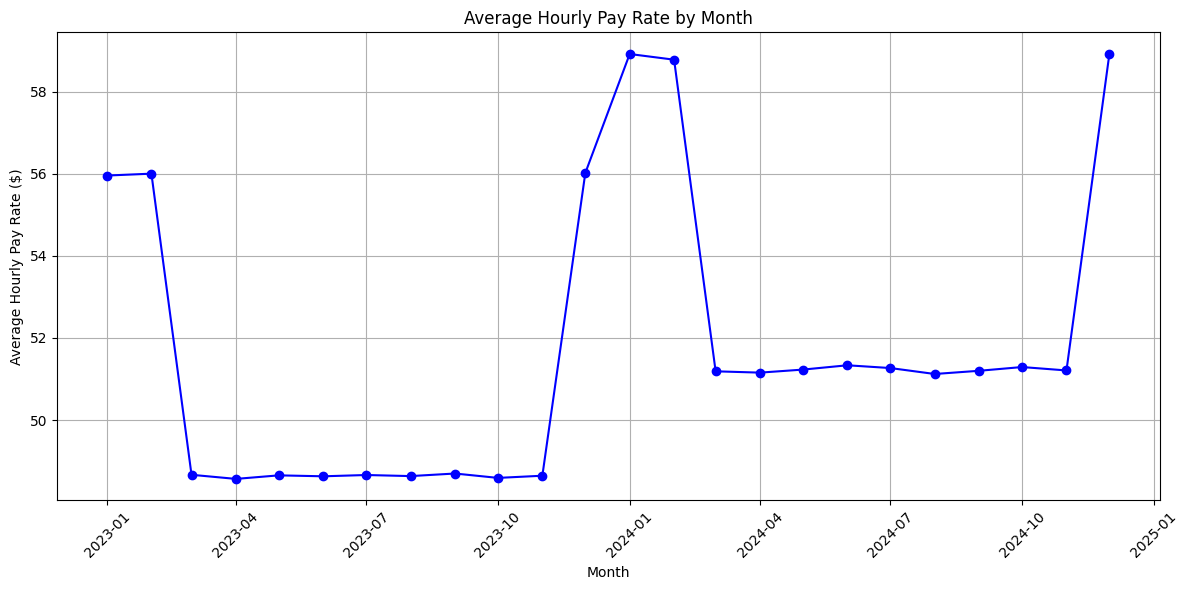

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['Month_Year'], monthly_avg['Hourly_Pay_Rate($)'], marker='o', linestyle='-', color='blue')
plt.title('Average Hourly Pay Rate by Month')
plt.xlabel('Month')
plt.ylabel('Average Hourly Pay Rate ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## above plot shows that

1.   hourly pay rate shoots up during flu which typically occur in winter months(Dec,Jan, Feb).
2.   hourly pay rate shoots up in Dec month because of Christmas holiday season



## **showing hourly pay rates against the desirability of a city**

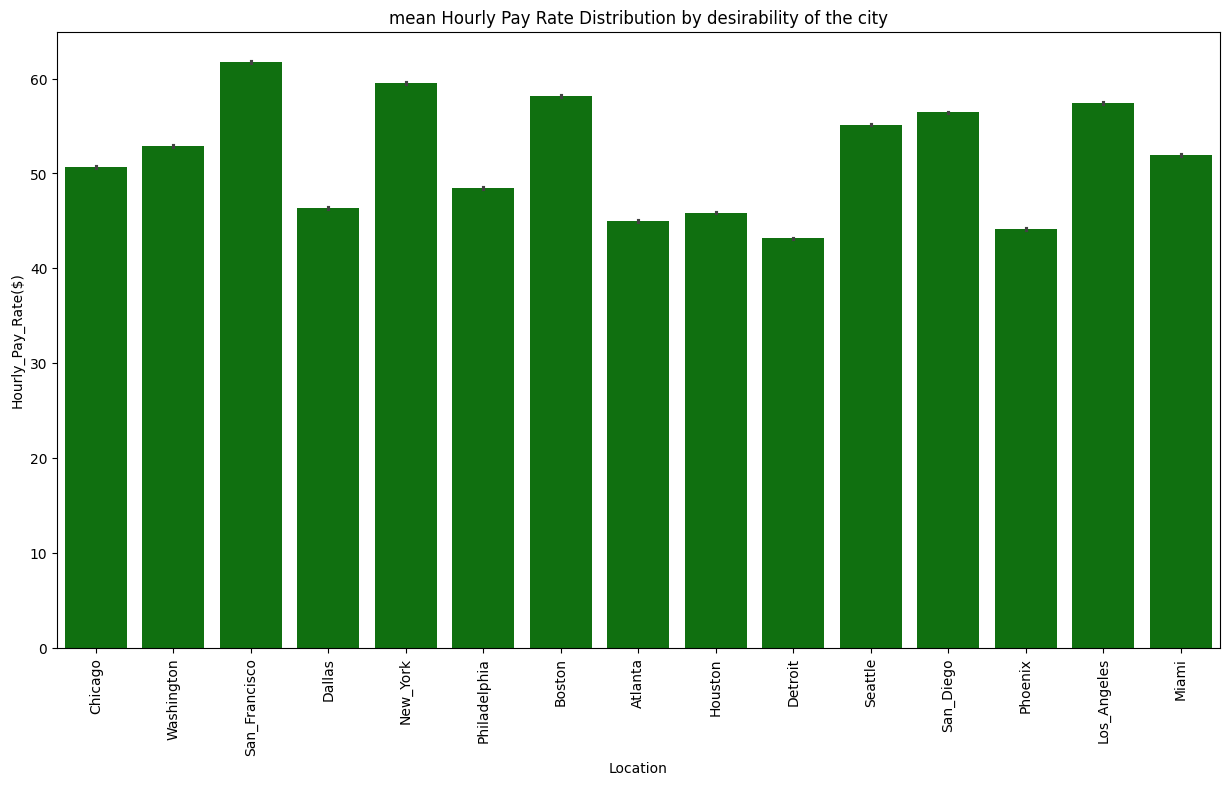

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(x='Location', y='Hourly_Pay_Rate($)', data=df, estimator='mean',color='green')
plt.title('mean Hourly Pay Rate Distribution by desirability of the city')
plt.xticks(rotation=90)
plt.show()

## above plot shows that
As cost of living is high in cities having good lifestyle so hourly pay rate is high in such cities

## **Showing nurses with spacilization in Oncology, cardiology and surgary are having high hourly pay rate**

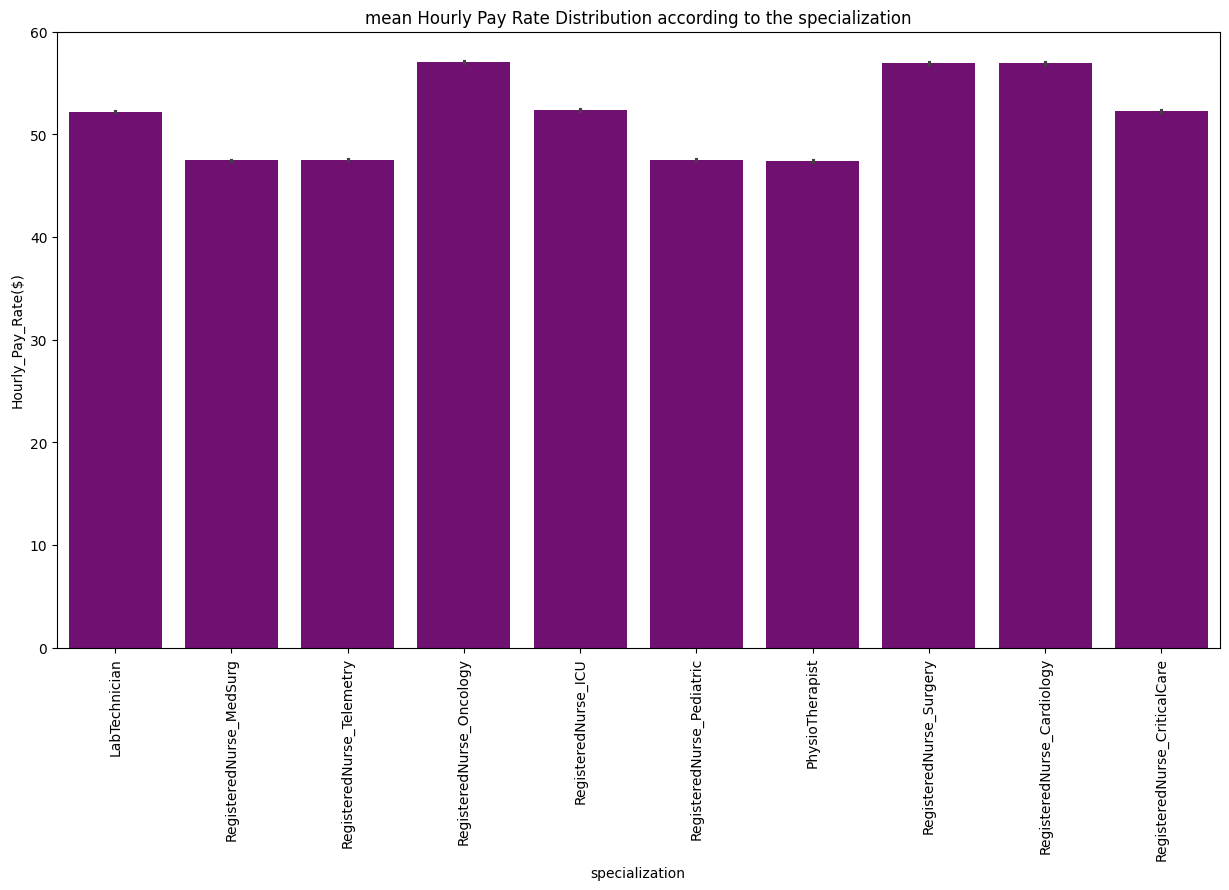

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x='Job_Title', y='Hourly_Pay_Rate($)', data=df, estimator='mean',color='purple')
plt.title('mean Hourly Pay Rate Distribution according to the specialization')
plt.xlabel('specialization')
plt.xticks(rotation=90)
plt.show()

## **checking for outliers**

<Axes: ylabel='Hourly_Pay_Rate($)'>

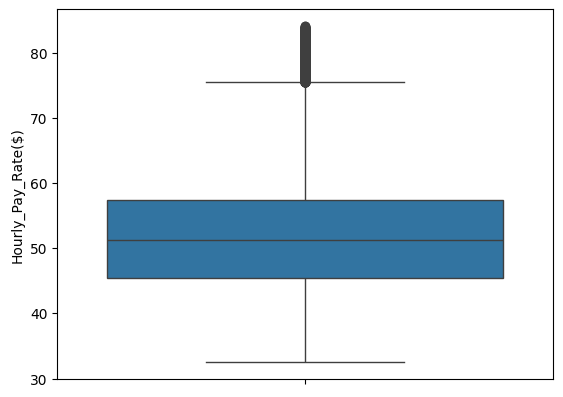

In [29]:
sns.boxplot(df['Hourly_Pay_Rate($)'])

In [30]:
len(df[df['Hourly_Pay_Rate($)']>75])

1695

In [31]:
## finding the IQR
pr75 = df['Hourly_Pay_Rate($)'].quantile(0.75)
pr25 = df['Hourly_Pay_Rate($)'].quantile(0.25)
iqr = pr75 - pr25
print('IQR:', iqr)

IQR: 12.025100000000002


In [32]:
## finding upper and lower limit
upper = pr75 + 1.5 * iqr
lower = pr25 - 1.5 * iqr
print(f'lower limit: {lower}\nupper limit: {upper}')

lower limit: 27.391349999999992
upper limit: 75.49175


In [33]:
# df = df[df['Hourly_Pay_Rate($)']<upper]

In [31]:
# ## boxplot after removing outliers
# sns.boxplot(df['Hourly_Pay_Rate($)'])

## **looking into the correlation of features**

In [32]:
df['start_day'] = df['Contract_Start_Date'].apply(lambda x: x.day)
df['start_month'] = df['Contract_Start_Date'].apply(lambda x: x.month)
df['start_year'] = df['Contract_Start_Date'].apply(lambda x: x.year)

df['end_day'] = df['Contract_End_Date'].apply(lambda x: x.day)
df['end_month'] = df['Contract_End_Date'].apply(lambda x: x.month)
df['end_year'] = df['Contract_End_Date'].apply(lambda x: x.year)

In [33]:
df.head()

,Job_Title,Location,Hospital_Name,Contract_Start_Date,Contract_End_Date,Hourly_Pay_Rate($),Month_Year,start_day,start_month,start_year,end_day,end_month,end_year
0,LabTechnician,Chicago,Chicago_Veterans,2023-11-28,2023-12-28,49.16725,2023-11,28,11,2023,28,12,2023
1,RegisteredNurse_MedSurg,Washington,Washington_Community,2023-03-26,2023-05-12,47.50950,2023-03,26,3,2023,12,5,2023
2,RegisteredNurse_Telemetry,San_Francisco,San Francisco_Govt,2023-10-13,2023-12-07,53.02900,2023-10,13,10,2023,7,12,2023
3,RegisteredNurse_Oncology,Washington,Washington_Community,2024-06-15,2024-07-20,55.59600,2024-06,15,6,2024,20,7,2024
4,RegisteredNurse_Oncology,Dallas,Dallas_NonProfit,2023-04-20,2023-06-08,43.55940,2023-04,20,4,2023,8,6,2023


In [34]:
hosp_name = {}
for j , i in enumerate(df['Hospital_Name'].unique()):
  hosp_name[i] = j

In [35]:
jobs = {'RegisteredNurse_Telemetry':0, 'RegisteredNurse_MedSurg':1,
       'RegisteredNurse_ICU':2, 'RegisteredNurse_Pediatric':3,
       'RegisteredNurse_Surgery':4, 'PhysioTherapist':5,
       'RegisteredNurse_Oncology':6, 'LabTechnician':7,
       'RegisteredNurse_Cardiology':8, 'RegisteredNurse_CriticalCare':9}
df2 = pd.DataFrame()
df2['Job_Title'] = df['Job_Title'].map(jobs)

In [36]:
loc_ = {'Detroit':1, 'San_Francisco':2, 'Los_Angeles':3, 'New_York':4, 'Phoenix':5,'Philadelphia':6, 'Houston':7, 'Boston':8, 'Atlanta':9, 'Chicago':10,
       'Dallas':11, 'Seattle':12, 'Miami':13, 'San_Diego':14, 'Washington':15}
df2['Location'] = df['Location'].map(loc_)

In [37]:
df2['Hospital_Name'] = df['Hospital_Name'].map(hosp_name)

In [38]:
df.shape

(250000, 13)

In [39]:
df2.shape

(250000, 3)

In [40]:
df.columns

Index(['Job_Title', 'Location', 'Hospital_Name', 'Contract_Start_Date',
       'Contract_End_Date', 'Hourly_Pay_Rate($)', 'Month_Year', 'start_day',
       'start_month', 'start_year', 'end_day', 'end_month', 'end_year'],
      dtype='object')

In [41]:
df[['start_day','start_month', 'start_year', 'end_day', 'end_month', 'end_year','Hourly_Pay_Rate($)']].head()

,start_day,start_month,start_year,end_day,end_month,end_year,Hourly_Pay_Rate($)
0,28,11,2023,28,12,2023,49.16725
1,26,3,2023,12,5,2023,47.50950
2,13,10,2023,7,12,2023,53.02900
3,15,6,2024,20,7,2024,55.59600
4,20,4,2023,8,6,2023,43.55940


In [42]:
df2 = pd.concat([df2,df[['start_day','start_month', 'start_year', 'end_day', 'end_month', 'end_year','Hourly_Pay_Rate($)']]],axis = 1)
df2.head()

,Job_Title,Location,Hospital_Name,start_day,start_month,start_year,end_day,end_month,end_year,Hourly_Pay_Rate($)
0,7,10,0,28,11,2023,28,12,2023,49.16725
1,1,15,1,26,3,2023,12,5,2023,47.50950
2,0,2,2,13,10,2023,7,12,2023,53.02900
3,6,15,1,15,6,2024,20,7,2024,55.59600
4,6,11,3,20,4,2023,8,6,2023,43.55940


In [43]:
matrix = df2.corr()

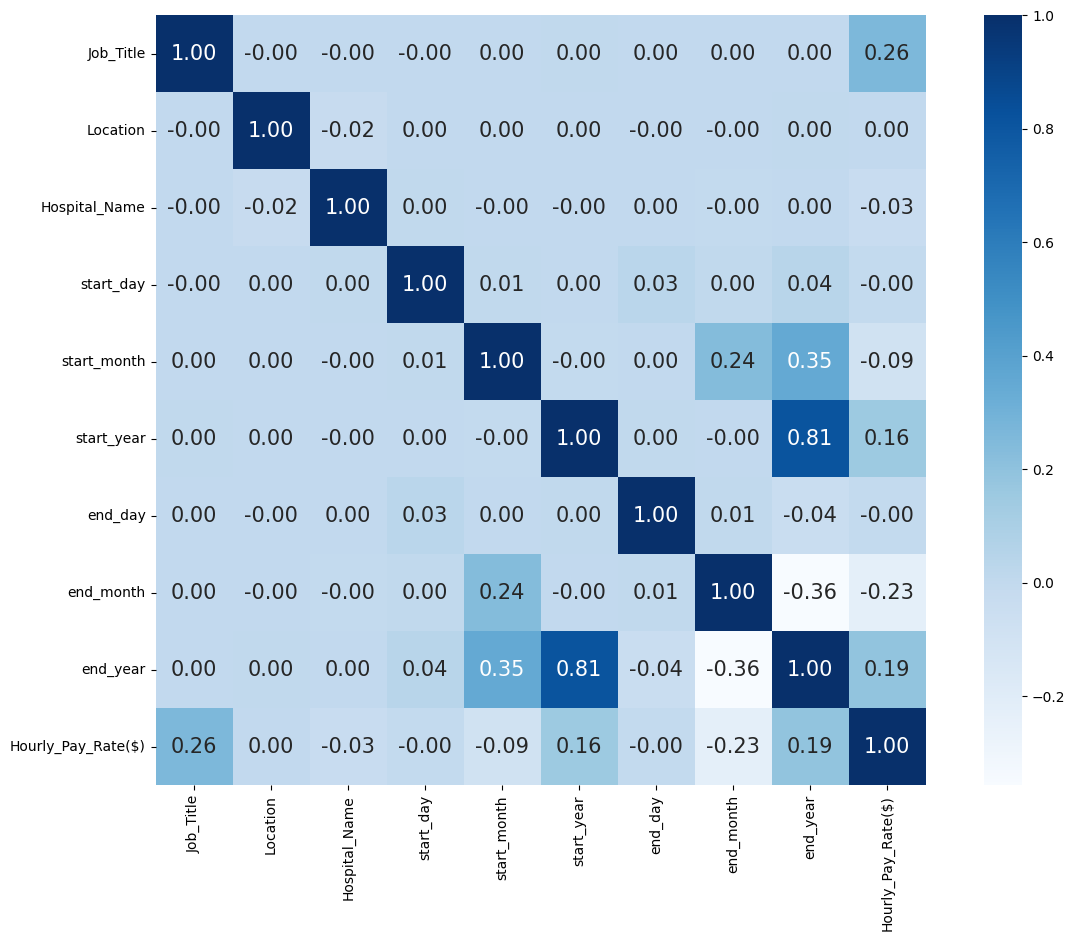

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(matrix,
                 cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 15},
                 cmap='Blues')
plt.show()

## **ML/DL models to predict the hourly rate**

### preprocessing data

In [45]:
df.drop(columns=['Month_Year'],inplace= True)
df.head()

,Job_Title,Location,Hospital_Name,Contract_Start_Date,Contract_End_Date,Hourly_Pay_Rate($),start_day,start_month,start_year,end_day,end_month,end_year
0,LabTechnician,Chicago,Chicago_Veterans,2023-11-28,2023-12-28,49.16725,28,11,2023,28,12,2023
1,RegisteredNurse_MedSurg,Washington,Washington_Community,2023-03-26,2023-05-12,47.50950,26,3,2023,12,5,2023
2,RegisteredNurse_Telemetry,San_Francisco,San Francisco_Govt,2023-10-13,2023-12-07,53.02900,13,10,2023,7,12,2023
3,RegisteredNurse_Oncology,Washington,Washington_Community,2024-06-15,2024-07-20,55.59600,15,6,2024,20,7,2024
4,RegisteredNurse_Oncology,Dallas,Dallas_NonProfit,2023-04-20,2023-06-08,43.55940,20,4,2023,8,6,2023


In [46]:
from sklearn.preprocessing import OneHotEncoder
enc_job = OneHotEncoder()
enc_job.fit(df[['Job_Title']])
enc_job.categories_
job_title_encoded = enc_job.transform(df[['Job_Title']]).toarray()
#df_enc = pd.DataFrame()
encoded_df = pd.DataFrame(job_title_encoded, columns=enc_job.get_feature_names_out(['Job_Title']))

In [47]:
enc_loc = OneHotEncoder()
loc_title_encoded = enc_loc.fit_transform(df[['Location']]).toarray()
encoded_df = pd.concat([encoded_df,pd.DataFrame(loc_title_encoded, columns=enc_loc.get_feature_names_out(['Location']))], axis= 1)

In [48]:
import pickle
with open('job_encoder.pkl','wb') as f:
    pickle.dump(enc_job,f)
with open('location_encoder.pkl','wb') as f:
    pickle.dump(enc_loc,f)

In [49]:
# enc_hn = OneHotEncoder()
# hs_name_encoded = enc_hn.fit_transform(df[['Hospital_Name']]).toarray()
# encoded_df = pd.concat([encoded_df,pd.DataFrame(hs_name_encoded, columns=enc_hn.get_feature_names_out(['Hospital_Name']))], axis= 1)

In [50]:
df_enc = pd.concat([encoded_df,df[['start_day','start_month', 'start_year', 'end_day', 'end_month', 'end_year','Hourly_Pay_Rate($)']]],axis = 1)

In [52]:
df_enc = df_enc.dropna()

In [54]:
df_enc.shape

(250000, 32)

**Splitting data into train, test and validation**

In [55]:
test = df_enc.tail(62500)
df_enc.drop(test.index,inplace=True)
print('train data shape: ',df_enc.shape)
print('test data shape: ',test.shape)

train data shape:  (187500, 32)
test data shape:  (62500, 32)


In [56]:
validation = test.tail(15625)
test.drop(validation.index,inplace= True)
print('test data shape: ',test.shape)
print('validation data shape: ',validation.shape)

test data shape:  (46875, 32)
validation data shape:  (15625, 32)


/tmp/ipykernel_962213/35773459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(validation.index,inplace= True)


In [57]:
x_train = df_enc.drop(columns=['Hourly_Pay_Rate($)'])
y_train = df_enc['Hourly_Pay_Rate($)']

x_test = test.drop(columns=['Hourly_Pay_Rate($)'])
y_test = test['Hourly_Pay_Rate($)']

x_val = validation.drop(columns=['Hourly_Pay_Rate($)'])
y_val = validation['Hourly_Pay_Rate($)']

print('shape of x_train', x_train.shape)
print('shape of y_train', y_train.shape)
print('shape of x_test', x_test.shape)
print('shape of y_test', y_test.shape)
print('shape of x_val', x_val.shape)
print('shape of y_val', y_val.shape)

shape of x_train (187500, 31)
shape of y_train (187500,)
shape of x_test (46875, 31)
shape of y_test (46875,)
shape of x_val (15625, 31)
shape of y_val (15625,)


## Linear regression

In [58]:
from sklearn.metrics import r2_score

In [59]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)
x_val_sc = scaler.transform(x_val)

In [60]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(x_train_sc,y_train)
print(r2_score(y_test,l_reg.predict(x_test_sc)))

0.7636336008370392


## Gradient boosting regressor

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators = 500, loss = 'absolute_error',max_depth = 6)
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(loss='absolute_error', max_depth=6, n_estimators=500)

In [189]:
gb_pred = gb_regressor.predict(x_test)
print('r2_score for test',r2_score(y_test,gb_pred))
print('MAE for test',mean_absolute_error(y_test,gb_pred))

gb_val = gb_regressor.predict(x_val)
print('r2_score for validation',r2_score(y_val,gb_val))
print('MAE for validation',mean_absolute_error(y_val,gb_val))

r2_score for test 0.856131675457795
MAE for test 2.7803498938425197
r2_score for validation 0.8577559472761005
MAE for validation 2.7634841303530613


In [190]:
## saving gradient boosting model
with open('gradient_boost_model.pkl','wb') as f:
    pickle.dump(gb_regressor,f)

## Deep learning approach

**1. LSTM**

In [63]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, BatchNormalization
from sklearn.metrics import mean_squared_error
import math

2024-11-27 23:59:59.697386: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-27 23:59:59.704583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732732199.711104  898332 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732732199.712947  898332 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 23:59:59.722912: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [107]:
# Reshape input data for LSTM
X_train_reshaped = x_train_sc.reshape((x_train_sc.shape[0], x_train_sc.shape[1], 1))
X_test_reshaped = x_test_sc.reshape((x_test_sc.shape[0], x_test_sc.shape[1], 1))
x_val_reshaped = x_val_sc.reshape((x_val_sc.shape[0], x_val_sc.shape[1], 1))

In [108]:
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)
print(x_val_reshaped.shape)

(184579, 31, 1)
(46875, 31, 1)
(15625, 31, 1)


In [109]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(184579,)
(46875,)
(15625,)


making more complex LSTM model

In [64]:
# Define the model
model = Sequential([
    # Input layer
    Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),

    # First LSTM layer with batch normalization
    LSTM(128, return_sequences=True, activation='tanh'),
    BatchNormalization(),
    Dropout(0.3),

    # Second LSTM layer with dropout
    LSTM(64, return_sequences=True, activation='tanh'),
    Dropout(0.3),

    # Third LSTM layer, no return_sequences as it's the last LSTM
    LSTM(32, return_sequences=False, activation='tanh'),
    BatchNormalization(),
    Dropout(0.3),

    # Fully connected layer
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Output layer
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print model summary
model.summary()

W0000 00:00:1732732206.249227  898332 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 31, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 31, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 31, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,457 (513.50 KB)

 Trainable params: 131,009 (511.75 KB)

 Non-trainable params: 448 (1.75 KB)

#### **Note: Training this model can take approximately 1 hour**

In [ ]:
model.fit(X_train_reshaped, y_train, 
          validation_data=(x_val_reshaped, y_val),
          epochs=50)

Epoch 1/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - loss: 26.2520 - mae: 4.0874 - val_loss: 10.7238 - val_mae: 2.7920
Epoch 2/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 84s 14ms/step - loss: 25.7117 - mae: 4.0507 - val_loss: 10.5357 - val_mae: 2.7752
Epoch 3/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 85s 15ms/step - loss: 25.0482 - mae: 4.0033 - val_loss: 10.4059 - val_mae: 2.7596
Epoch 4/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 84s 14ms/step - loss: 24.4298 - mae: 3.9468 - val_loss: 10.3342 - val_mae: 2.7564
Epoch 5/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 84s 14ms/step - loss: 23.8868 - mae: 3.9147 - val_loss: 10.2874 - val_mae: 2.7531
Epoch 6/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 85s 14ms/step - loss: 23.3771 - mae: 3.8725 - val_loss: 10.4828 - val_mae: 2.7704
Epoch 7/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 84s 14ms/step - loss: 22.9646 - mae: 3.8366 - val_loss: 15.1441 - val_mae: 3.1494
Epoch 8/50
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - loss: 24.2940 - mae: 3.9329 - val_loss: 10.5075 - val_mae: 2.7717
Epoch 9/

In [75]:
lstm_pred = model.predict(X_test_reshaped)
print('r2 score on test data: ',r2_score(y_test,lstm_pred))

1465/1465 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
r2 score on test data:  0.8578210726275166


In [77]:
lstm_val = model.predict(x_val_reshaped)
print('r2 score on validation data: ',r2_score(y_val,lstm_val))

489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
r2 score on validation data:  0.8594701057487002


In [179]:
print('MAE on test data: ',mean_absolute_error(y_test,lstm_pred))
print('MAE on validation data: ',mean_absolute_error(y_val,lstm_val))

MAE on test data:  7.347907611352734
MAE on validation data:  7.311180557408985


## **Building a streamlit app**

In [1]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import pickle

## importing a ML model
with open('gradient_boost_model.pkl','rb') as f:
    gb_model = pickle.load(f)

with open('job_encoder.pkl', 'rb') as f:
    enc_job = pickle.load(f)
with open('location_encoder.pkl', 'rb') as f:
    enc_loc = pickle.load(f)

st.title("Hourly Pay Rate Prediction")

st.header("Enter the details below:")
job_title = st.selectbox(
    "Job Title", 
    options=["RegisteredNurse_ICU", "RegisteredNurse_MedSurg", "RegisteredNurse_Telemetry",
        "RegisteredNurse_Oncology", "RegisteredNurse_Pediatric", "PhysioTherapist",
        "LabTechnician", "RegisteredNurse_CriticalCare", "RegisteredNurse_Cardiology",
        "RegisteredNurse_Surgery"],
    help="Select the job title from the dropdown."
)

location = st.selectbox(
    "Location", 
    options=["Dallas", "Atlanta", "New York", "Philadelphia", "Washington", "San Francisco",
        "Los Angeles", "Seattle", "Chicago", "San Diego", "Miami", "Boston",
        "Detroit", "Phoenix", "Houston"],
    help="Select the Location from the dropdown."
)
hospital_name = st.text_input("Hospital Name",help="Enter Hospital Name (EX: Chicago Veterans)")
contract_start = st.date_input("Contract Start Date")
contract_end = st.date_input("Contract End Date")

u_df = {'Job_Title':[job_title], 'Location':[location], 'Hospital_Name':[hospital_name], 'Contract_Start_Date':[contract_start],'Contract_End_Date':[contract_end]}
user_df = pd.DataFrame(u_df)
user_df.Location = user_df.Location.apply(lambda x: x.replace(' ','_'))

user_df['Contract_Start_Date'] = pd.to_datetime(user_df['Contract_Start_Date'])
user_df['Contract_End_Date'] = pd.to_datetime(user_df['Contract_End_Date'])
user_df['start_day'] = user_df['Contract_Start_Date'].apply(lambda x: x.day)
user_df['start_month'] = user_df['Contract_Start_Date'].apply(lambda x: x.month)
user_df['start_year'] = user_df['Contract_Start_Date'].apply(lambda x: x.year)

user_df['end_day'] = user_df['Contract_End_Date'].apply(lambda x: x.day)
user_df['end_month'] = user_df['Contract_End_Date'].apply(lambda x: x.month)
user_df['end_year'] = user_df['Contract_End_Date'].apply(lambda x: x.year)

u_job_title_encoded = enc_job.transform(user_df[['Job_Title']]).toarray()
u_encoded_df = pd.DataFrame(u_job_title_encoded, columns=enc_job.get_feature_names_out(['Job_Title']))

u_loc_title_encoded = enc_loc.transform(user_df[['Location']]).toarray()
u_encoded_df = pd.concat([u_encoded_df,pd.DataFrame(u_loc_title_encoded, columns=enc_loc.get_feature_names_out(['Location']))], axis= 1)

df_enc = pd.concat([u_encoded_df,user_df[['start_day','start_month', 'start_year', 'end_day', 'end_month', 'end_year']]],axis = 1)


# Dummy model prediction
if st.button("Predict Hourly Pay Rate"):
    prediction = gb_model.predict(df_enc)
    st.success(f"The predicted Hourly Pay Rate is: ${prediction[0]:.2f}")

Overwriting app.py


## **Run app on local machine**

In [ ]:
!streamlit run app.py

## **Run app on server**

In [ ]:
import os

# Run the Streamlit app
os.system("streamlit run app.py --server.port 8501 --server.address 0.0.0.0")




  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8501



## **Time series forcasting**

In [ ]:
!pip install fbprophet

In [65]:
## importing the libraries
import plotly
from prophet import Prophet

In [66]:
df.head()

,Job_Title,Location,Hospital_Name,Contract_Start_Date,Contract_End_Date,Hourly_Pay_Rate($),start_day,start_month,start_year,end_day,end_month,end_year
0,LabTechnician,Chicago,Chicago_Veterans,2023-11-28,2023-12-28,49.16725,28,11,2023,28,12,2023
1,RegisteredNurse_MedSurg,Washington,Washington_Community,2023-03-26,2023-05-12,47.50950,26,3,2023,12,5,2023
2,RegisteredNurse_Telemetry,San_Francisco,San Francisco_Govt,2023-10-13,2023-12-07,53.02900,13,10,2023,7,12,2023
3,RegisteredNurse_Oncology,Washington,Washington_Community,2024-06-15,2024-07-20,55.59600,15,6,2024,20,7,2024
4,RegisteredNurse_Oncology,Dallas,Dallas_NonProfit,2023-04-20,2023-06-08,43.55940,20,4,2023,8,6,2023


In [107]:
## taking the dates and the hourly pay rate as our main dataset
t_data = df[['Contract_Start_Date','Hourly_Pay_Rate($)']]
t_data = t_data.sort_values(by='Contract_Start_Date') ## sorting data according to the date
t_data.rename(columns={'Contract_Start_Date':'ds','Hourly_Pay_Rate($)':'y'}, inplace= True) ## bringing data for prophet format
print(t_data.shape)
t_data.head()

(250000, 2)


,ds,y
98057,2023-01-01,56.9525
249180,2023-01-01,62.6620
187044,2023-01-01,50.3481
162037,2023-01-01,65.4474
245585,2023-01-01,45.3720


## splitting data in train and test

In [111]:
test_data = t_data[t_data['ds'] >='2024-08-06']
test_data.shape

(50326, 2)

In [112]:
train_data = t_data[t_data['ds'] <'2024-08-06']
train_data.shape

(199674, 2)

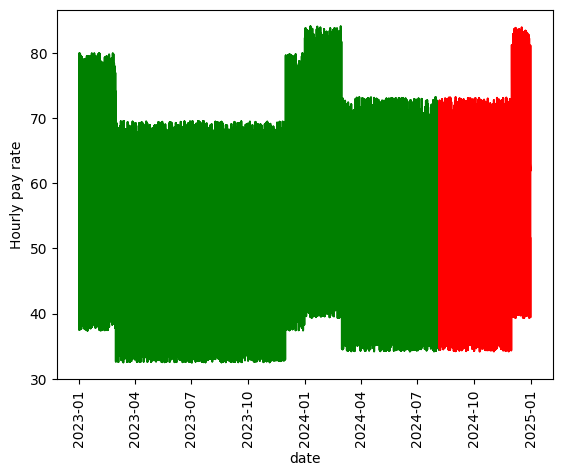

In [118]:
## plotting
plt.plot(train_data['ds'], train_data['y'], color='g')
plt.plot(test_data['ds'], test_data['y'], color='r')
plt.xlabel('date')
plt.ylabel('Hourly pay rate')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## training model
%%time
time_model = Prophet()
time_model.fit(train_data)

15:46:38 - cmdstanpy - INFO - Chain [1] start processing
15:47:12 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 1.65 s, sys: 78.7 ms, total: 1.73 s
Wall time: 36.2 s


In [151]:
## prdicting for new
t_pred = time_model.predict(test_data)
# t_pred.head()

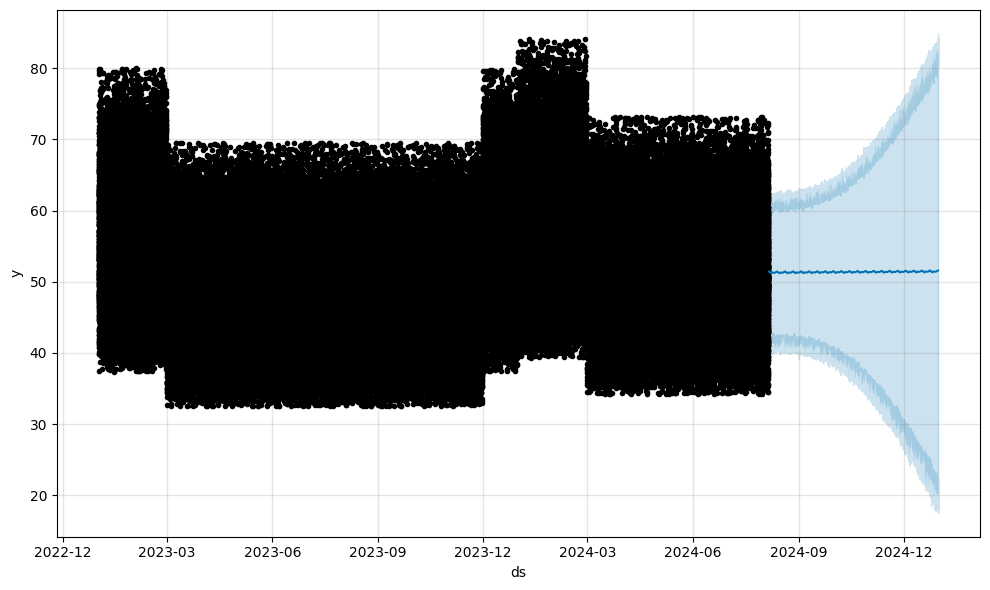

In [134]:
## plotting the forcast
fig = time_model.plot(t_pred)

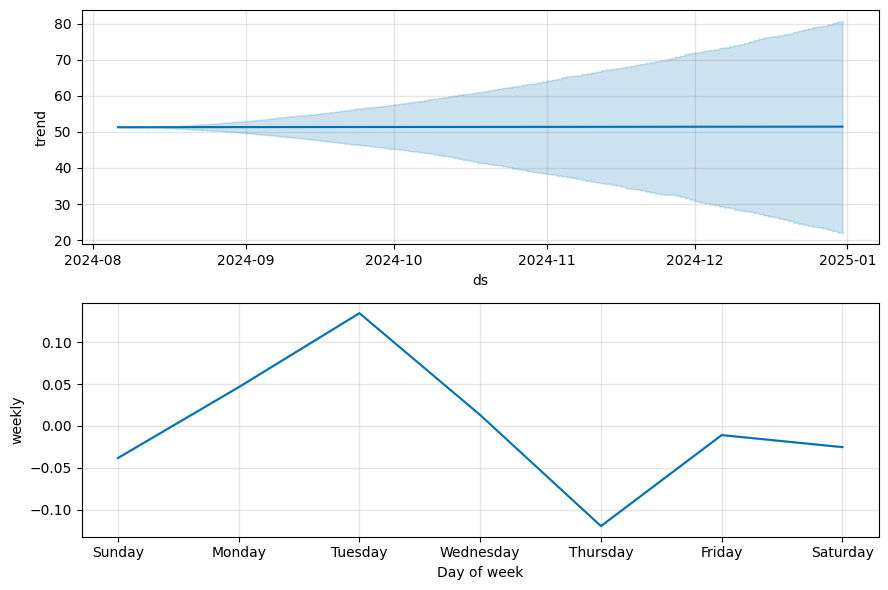

In [135]:
fig = time_model.plot_components(t_pred)

<Figure size 1500x500 with 0 Axes>

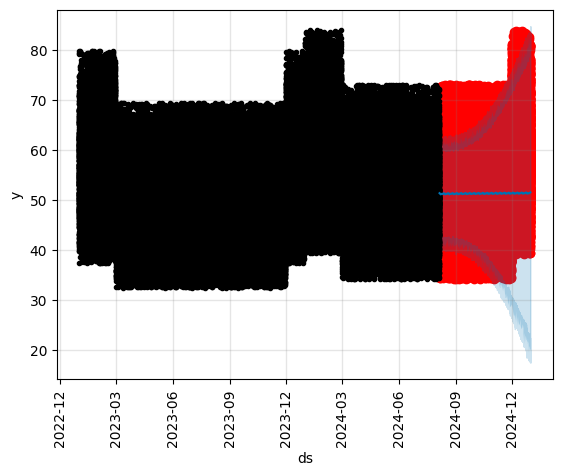

In [147]:
plt.figure(figsize=(15,5))
f, ax = plt.subplots()
ax.scatter(test_data['ds'],test_data['y'],color = 'r')
fig = time_model.plot(t_pred, ax = ax)
#ax.set_xbound(lower='2024-08-06',upper='2024-08-06')
plt.xticks(rotation = 90)
plt.show()

In above plot reds are the actual values and blues are the prdected values

In [149]:
## evaluating the model
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(test_data['y'],t_pred['yhat']))

6.942398848001703


## **Conclusions**
1. In this case ML model seems to performed better compared to DL model
2. for time series forcasting mean_absolute_error of the model is 6.94 which tells that model is not performing very nicely, as it trained on synthetic data. training on actual data can show improved results